In [1]:
from timing_reso import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import scipy
from scipy.stats import norm
import os, glob

In [73]:
def get_fm(data, fraction):
    frac = max(data) * fraction;
    idxs=[]
    for i in range(len(data)):
        if data[i] > frac:
            idxs.append(i)

    return min(idxs)

def get_timing_delays_trace(path, num_traces, sigma, fraction):
    
    time_delays = []
    
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    for f in csv_files:

        # read the csv file
        data = pd.read_csv(f, skiprows=1)

        p1 = np.array(data['1 (VOLT)'])
        #print(p1)
        p2 = np.array(data['4 (VOLT)'])
        
        time = np.array(data['Time (s)'])
        
        p1 = scipy.ndimage.gaussian_filter(p1, sigma = sigma)
        p2 = scipy.ndimage.gaussian_filter(p2, sigma = sigma)
        
        #plt.plot(p1)
        #plt.plot(p2)
        #plt.show()
        
        id_1 = get_fm(p1, fraction)
        id_2 = get_fm(p2, fraction)
        
        
        time_delay = time[id_1]-time[id_2]
        time_delays.append(time_delay)
        
    plt.hist(np.array(time_delays), density=True, alpha=0.6, color='purple')
    mu, std = norm.fit(time_delays)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title("Constant Fraction Timing Method")
    
    plt.show()
    
    mean_rounded = "{:.3f}".format((np.mean(time_delays)) * 10 ** 9)
    sr_rounded = "{:.3f}".format((np.std(time_delays)) * 10 ** 9)
    median_rounded = "{:.3f}".format((np.median(time_delays)) * 10 ** 9)

    mean = "Mean: " + str(mean_rounded) + " ns"
    SD = "Standard Deviation: " + str(sr_rounded) + " ns"
    median = "Median: " + str(median_rounded) + " ns"
    

    print(mean)
    print(SD)
    print(median)
    
        
    return time_delays

In [87]:
sigma = 20
frac = 0.9999

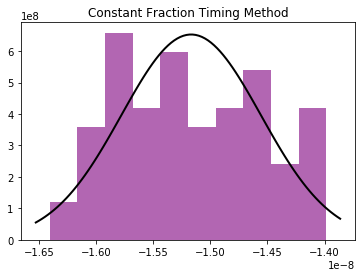

Mean: -15.168 ns
Standard Deviation: 0.611 ns
Median: -15.234 ns


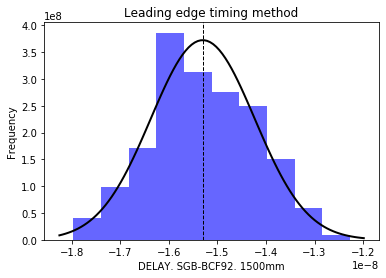

Mean: -15.303 ns
Standard Deviation: 1.071 ns
Median: -15.310 ns


In [88]:
path = 'sensL sipm delays 20 cm/SNSL_sipm_trace_20_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 20 cm/SNSL_sipm_delay_20_f.csv')
histogramCalc(data, 1500, 3000)

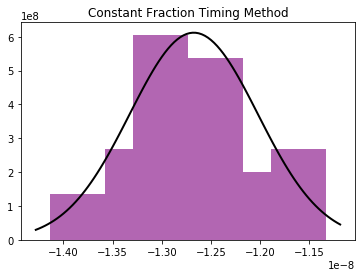

Mean: -12.675 ns
Standard Deviation: 0.652 ns
Median: -12.734 ns
<class 'pandas.core.frame.DataFrame'>


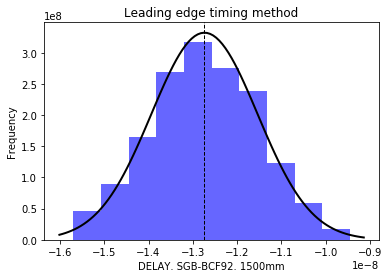

Mean: -12.737 ns
Standard Deviation: 1.201 ns
Median: -12.730 ns


In [96]:
path = 'sensL sipm delays 40 cm/SNSL_sipm_trace_40_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 40 cm/SNSL_sipm_delay_40_f.csv')
print(type(data))
histogramCalc(data, 1500, 3000)

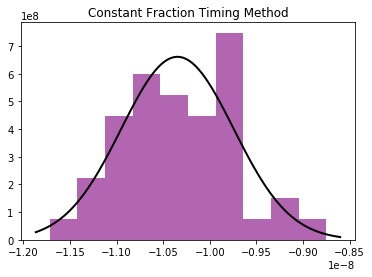

Mean: -10.347 ns
Standard Deviation: 0.603 ns
Median: -10.391 ns


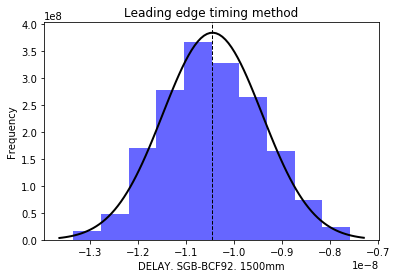

Mean: -10.452 ns
Standard Deviation: 1.039 ns
Median: -10.545 ns


In [90]:
path = 'sensL sipm delays 60 cm/SNSL_sipm_trace_60_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 60 cm/SNSL_sipm_delay_60_f.csv')
histogramCalc(data, 1500, 3000)

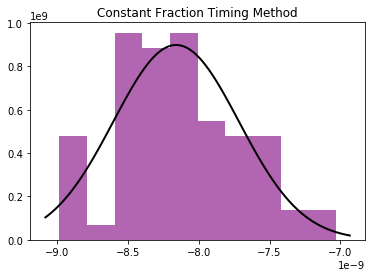

Mean: -8.159 ns
Standard Deviation: 0.444 ns
Median: -8.203 ns


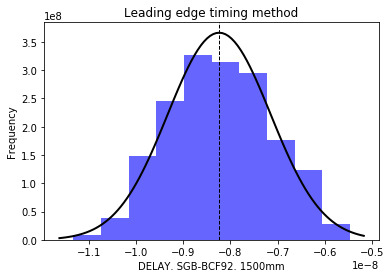

Mean: -8.240 ns
Standard Deviation: 1.089 ns
Median: -8.280 ns


In [91]:
path = 'sensL sipm delays 80 cm/SNSL_sipm_trace_80_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 80 cm/SNSL_sipm_delay_80_f.csv')
histogramCalc(data, 1500, 3000)

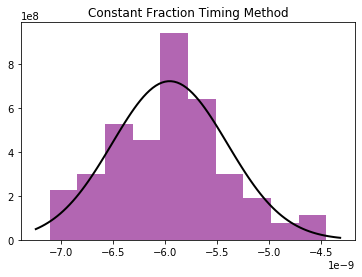

Mean: -5.957 ns
Standard Deviation: 0.553 ns
Median: -5.977 ns


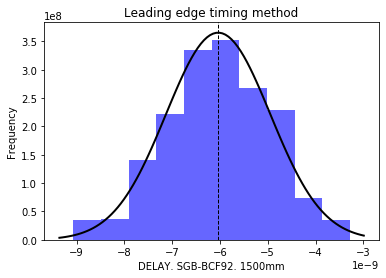

Mean: -6.038 ns
Standard Deviation: 1.091 ns
Median: -6.020 ns


In [92]:
path = 'sensL sipm delays 100 cm/SNSL_sipm_trace_100_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 100 cm/SNSL_sipm_delay_100_f.csv')
histogramCalc(data, 1500, 3000)

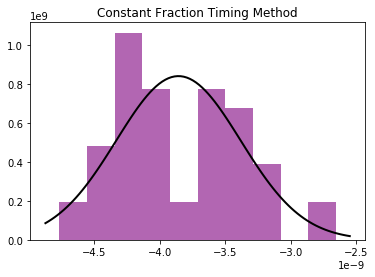

Mean: -3.857 ns
Standard Deviation: 0.474 ns
Median: -3.984 ns


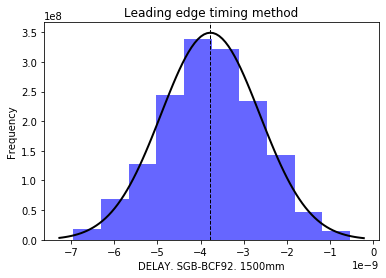

Mean: -3.774 ns
Standard Deviation: 1.143 ns
Median: -3.750 ns


In [93]:
path = 'sensL sipm delays 120 cm/SNSL_sipm_trace_120_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 120 cm/SNSL_sipm_delay_120_f.csv')
histogramCalc(data, 1500, 3000)

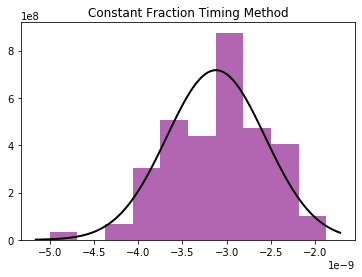

Mean: -3.122 ns
Standard Deviation: 0.556 ns
Median: -2.969 ns


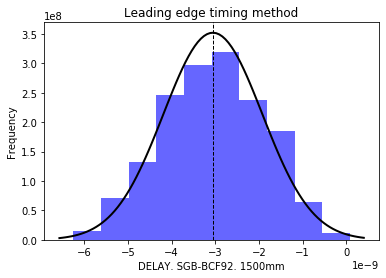

Mean: -3.056 ns
Standard Deviation: 1.133 ns
Median: -3.050 ns


In [94]:
path = 'sensL sipm delays 150 cm/SNSL_sipm_trace_half_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

td_trace = get_timing_delays_trace(path, numshots, sigma, frac)

data = pd.read_csv('sensL sipm delays 150 cm/SNSL_sipm_delay_half_f.csv')
histogramCalc(data, 1500, 3000)